# 1. Import Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [3]:
print("Size of X_train:", X_train.shape) 
print("Size of Y_train:", Y_train.shape) 
print("Size of X_test:", X_test.shape)    
print("Size of Y_test:", Y_test.shape) 

Size of X_train: (60000, 28, 28)
Size of Y_train: (60000,)
Size of X_test: (10000, 28, 28)
Size of Y_test: (10000,)


In [4]:
# Reshape the data
X_train = X_train.reshape(len(X_train), 28 * 28)
X_test = X_test.reshape(len(X_test), 28 * 28)

print(f"Training data shape: {X_train.shape}, Labels: {Y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Labels: {Y_test.shape}")

Training data shape: (60000, 784), Labels: (60000,)
Testing data shape: (10000, 784), Labels: (10000,)


## Show data

In [5]:
import pandas as pd

pixel = dict()
pixel["label"] = Y_train.flatten()  # Flatten Y_train to make it 1-dimensional
for i in range(X_train.shape[1]):
    pixel["pixel " + str(i+1)] = X_train[:,i]
df_train = pd.DataFrame(pixel)
df_train.head(10)  

,label,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,133,167,73,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,1,1,0,0,...,0,0,3,0,82,237,231,70,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


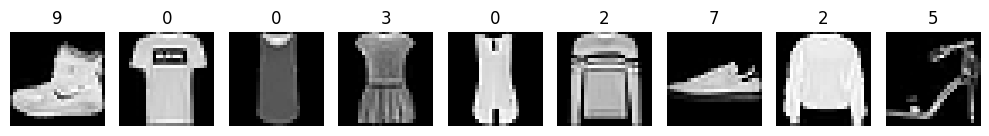

In [6]:
def plot_samples(X, Y, n=9):
    plt.figure(figsize=(10, 3)) 
    for i in range(n):
        plt.subplot(1, n, i + 1)

        img = X[i].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(str(Y[i])) 
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_samples(X_train, Y_train, n=9)

## 2. Analyze Variance Ratio and choose the number of components

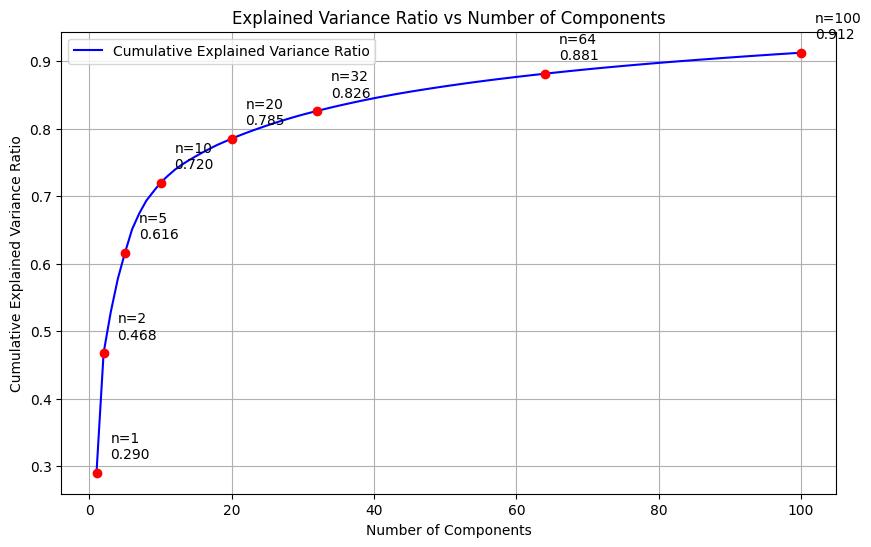


Variance ratio retained with different number of components:
n_components = 1: 29.04%
n_components = 2: 46.79%
n_components = 5: 61.62%
n_components = 10: 71.99%
n_components = 20: 78.51%
n_components = 32: 82.61%
n_components = 64: 88.13%
n_components = 100: 91.23%


In [7]:
from pca import PCA
import matplotlib.pyplot as plt

X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0

n_components_max = 100
pca = PCA(n_components=n_components_max)
pca.fit(X_train_norm)

cum_var_ratio = pca.information_percent()

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components_max + 1), cum_var_ratio, 'b-', label='Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.legend()



for n in [1, 2, 5, 10, 20, 32, 64, 100]:
    plt.plot(n, cum_var_ratio[n-1], 'ro')
    plt.annotate(f'n={n}\n{cum_var_ratio[n-1]:.3f}', 
                xy=(n, cum_var_ratio[n-1]), 
                xytext=(10, 10),
                textcoords='offset points')

plt.show()


print("\nVariance ratio retained with different number of components:")
for n in [1, 2, 5, 10, 20, 32, 64, 100]: 
    print(f"n_components = {n}: {cum_var_ratio[n-1]*100:.2f}%")

# 3. Principal components analysis with 32 components
## Based on the variance ratio analysis above, using 32 components retains 85.13% of the total variance in the data, which provides a good balance between dimensionality reduction and information preservation. This suggests that 32 components is a reasonable choice for our PCA analysis.

In [8]:
from pca import PCA

n_component = 32
pca = PCA(n_components=n_component)

pca_train = pca.fit_transform(X_train)
pca_test = pca.fit_transform(X_test)


## Show 32 components


In [9]:
col_names_train = dict()
for i in range(n_component):
    col_names_train["PCs " + str(i + 1)] = pca_train[:, i]

df_train_pca = pd.DataFrame(col_names_train)
df_train_pca["Label"] = Y_train
df_train_pca[:10]

,PCs 1,PCs 2,PCs 3,PCs 4,PCs 5,PCs 6,PCs 7,PCs 8,PCs 9,PCs 10,...,PCs 24,PCs 25,PCs 26,PCs 27,PCs 28,PCs 29,PCs 30,PCs 31,PCs 32,Label
0,-123.993791,1633.074396,1211.041191,240.793118,3.348351,-404.340455,91.505515,-201.375258,-32.915774,29.809371,...,-38.599698,217.830762,41.810589,-109.975005,-115.610760,-112.868637,97.183575,-92.079332,313.193192,9
1,1407.928853,-451.641336,261.027034,366.436695,-215.437558,1269.183187,148.350092,224.292458,-115.631093,229.845294,...,83.569301,169.917884,-234.324773,-48.991116,-23.620424,213.767893,-174.593583,-4.079122,-60.779412,0
2,-725.910795,-1101.838138,-106.154242,210.031701,105.123019,-53.417242,2.085852,-51.304638,-91.181273,83.071415,...,4.594570,94.121280,92.314936,-36.901389,-115.591632,76.411762,105.461877,-108.609948,-117.170230,0
3,31.398664,-981.067672,-202.580930,378.274376,-16.283660,184.904390,112.847785,-15.280460,-344.278934,-69.950293,...,-85.289515,130.900451,42.888901,51.386066,-133.161549,-80.038394,73.164566,51.224695,-9.774292,3
4,804.119258,-1201.168720,744.377121,-269.630116,-404.982684,-150.401060,-230.429128,-141.440010,14.652715,164.896820,...,62.656923,-2.537846,37.663130,-87.657068,47.486996,-28.082324,44.287891,167.042092,-13.971529,0
5,1177.509194,504.451223,-617.325508,78.515718,461.466937,-63.586711,-361.206200,411.705955,-144.033177,562.958539,...,30.303508,133.394394,4.725284,174.271217,-16.099055,-8.242064,53.756190,53.277004,-4.999260,2
6,-1493.518389,342.610132,-147.407974,-769.129203,-409.715195,141.896075,44.243544,591.294903,-85.031566,-55.572149,...,-139.078016,111.704355,218.076731,-149.805209,142.310568,112.297193,-68.870765,-93.735776,108.647745,7
7,1827.994051,1676.243004,-336.935031,-478.597083,1051.766331,227.084516,-606.646018,56.909596,-234.005637,142.210852,...,170.412015,-162.433644,-82.841916,-335.278967,-38.937973,37.277341,-215.237179,-36.970464,-167.485008,2
8,-1583.028600,-385.753718,-105.228315,1011.066778,281.034361,100.258080,-133.831883,61.191431,273.809577,-338.790157,...,63.776982,-202.263963,80.798304,32.894861,47.670077,-152.367332,-172.615317,-30.083463,0.396202,5
9,-945.689503,415.566577,68.899960,1396.696053,203.471185,-172.531974,-138.380219,-80.812023,172.826415,-434.383199,...,-7.598576,-554.888993,237.634239,-10.960973,-80.549090,-62.961009,8.436763,-131.345622,-94.689138,5


## Show information percent of each component

[0.29166946 0.46807613 0.52823624 0.57774205 0.61606109 0.65057567
 0.67427347 0.69328666 0.70649533 0.71944416 0.72933491 0.73855463
 0.74615149 0.75262662 0.75883389 0.76468648 0.77026154 0.77559665
 0.78040858 0.78485898 0.78923659 0.79332917 0.79718551 0.80094049
 0.80459614 0.80803427 0.81143686 0.81458071 0.81770592 0.82072047
 0.82350141 0.82624178]


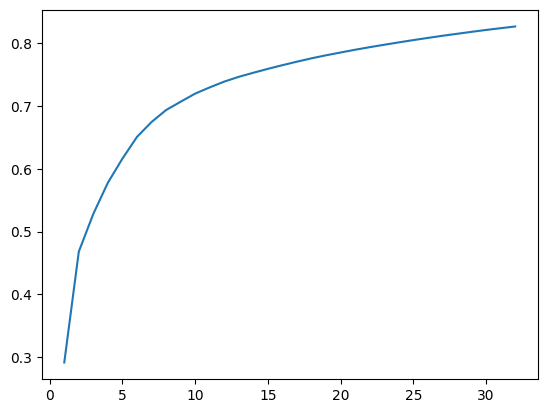

In [10]:
import numpy as np

x = np.arange(1, n_component+1)
y = pca.information_percent()
print(y)
plt.plot(x, y)
plt.show()

# 4. Project data to 32 components

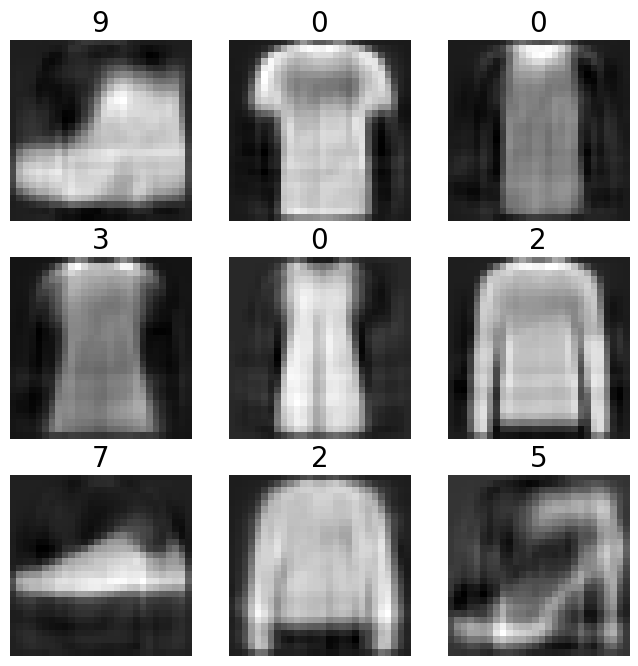

In [11]:
project_data = pca.project_data(X_train)
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(project_data[i].reshape(28,28),cmap='gray')
    plt.title(Y_train[i], fontsize=20)
    plt.axis("off")
plt.show()

Shape của dữ liệu sau transform: (60000, 32)


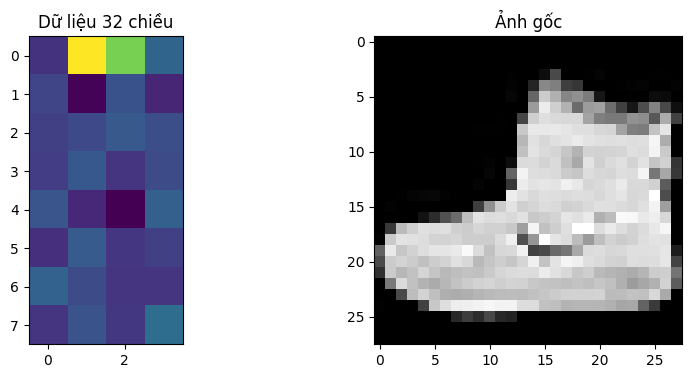

In [21]:
# Lấy dữ liệu đã transform (32 chiều)
transformed_data = pca.fit_transform(X_train)
print("Shape của dữ liệu sau transform:", transformed_data.shape)

# Thử hiển thị trực tiếp
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(transformed_data[0].reshape(8, 4))  # 32 = 8 x 4
plt.title("Dữ liệu 32 chiều")

# So sánh với ảnh gốc
plt.subplot(1, 2, 2)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title("Ảnh gốc")
plt.show()